# Data Analytics - Lab 1.

In [1]:
import numpy as np
np.__version__

'1.22.3'

## Array generation

In [9]:
uniform = np.random.uniform(0, 1, 1000)
normal_sigma_1 = np.random.normal(0, 1, 1000)
normal_sigma_10 = np.random.normal(0, 10, 1000)
ab_pairs = [(1, 1), (2, 2), (3, 9)]

try:
    beta_1d_0_0 = np.random.beta(0, 0, 1000)
except ValueError as e:
    print("Can't create a beta distribution with alpha=0: ", str(e))
betas = [np.random.beta(1, 1, 1000), 
         np.random.beta(2, 2, 1000), 
         np.random.beta(3, 9, 1000)]

multivariate_1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 10000)
multivariate_2 = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10000)

Can't create a beta distribution with alpha=0:  a <= 0


## Visualization

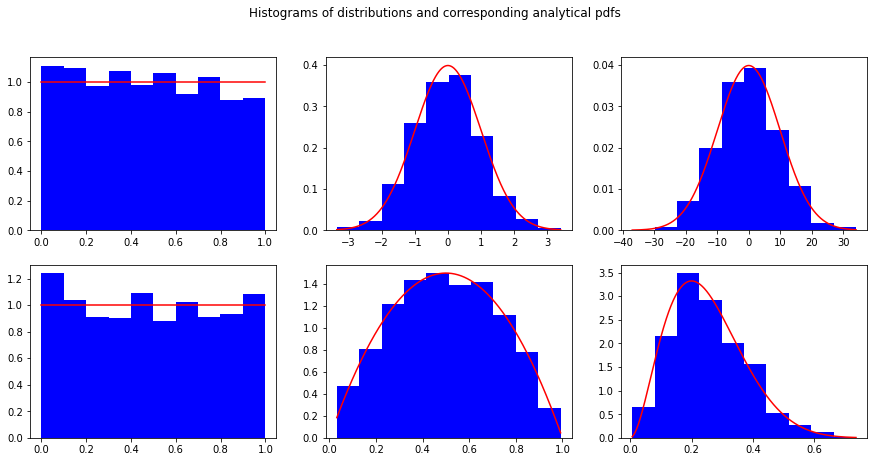

In [19]:
from scipy import stats
from matplotlib import pyplot as plt

distributions = [[uniform, normal_sigma_1, normal_sigma_10], [betas[0], betas[1], betas[2]]]
analytical_funcs = [[stats.uniform, stats.norm, stats.norm], [stats.beta, stats.beta, stats.beta]]
analytical_param = [[(0,1), (0,1), (0,10)], ab_pairs]

fig, ax = plt.subplots(2, 3, figsize=(15, 7))

for i in range(2):
    for j in range(3):
        x_analytical = np.linspace(np.min(distributions[i][j]), np.max(distributions[i][j]), 1000)
        ax[i,j].hist(distributions[i][j], density=True, color='b')
        ax[i,j].plot(x_analytical, analytical_funcs[i][j].pdf(x_analytical, *(analytical_param[i][j])), color='r')
fig.suptitle("Histograms of distributions and corresponding analytical pdfs")
plt.show()

Text(0.5, 1.0, 'Multivariate [[2,1],[1,2]] bins 50')

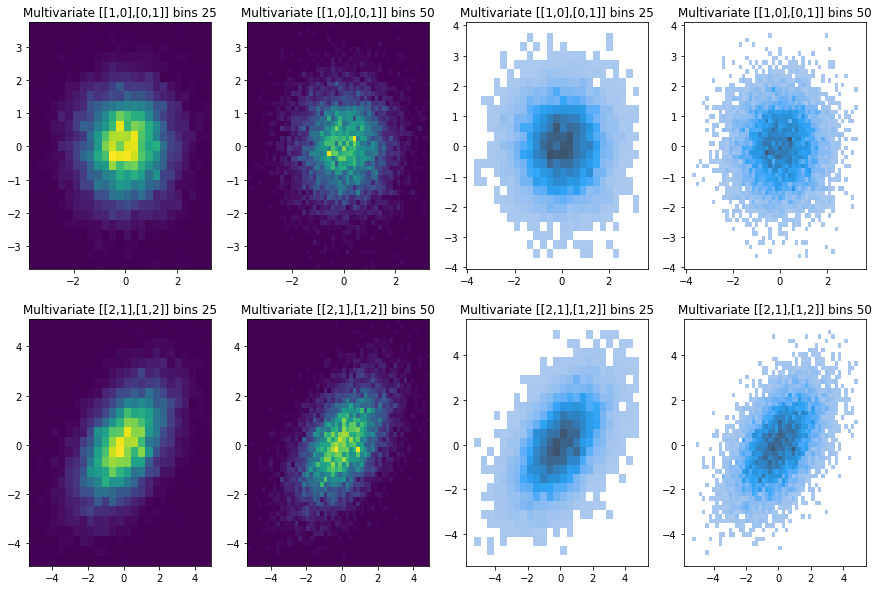

In [42]:
import seaborn as sns

title_mv_1 = "Multivariate [[1,0],[0,1]]"
title_mv_2 = "Multivariate [[2,1],[1,2]]"

fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0,0].hist2d(x=multivariate_1[:,0], y=multivariate_1[:,1], bins=25)
ax[0,1].hist2d(x=multivariate_1[:,0], y=multivariate_1[:,1], bins=50)
sns.histplot(x=multivariate_1[:,0], y=multivariate_1[:,1], ax=ax[0,2], bins=25)
sns.histplot(x=multivariate_1[:,0], y=multivariate_1[:,1], ax=ax[0,3], bins=50)
ax[0,0].set_title(f"{title_mv_1} bins 25")
ax[0,1].set_title(f"{title_mv_1} bins 50")
ax[0,2].set_title(f"{title_mv_1} bins 25")
ax[0,3].set_title(f"{title_mv_1} bins 50")

ax[1,0].hist2d(x=multivariate_2[:,0], y=multivariate_2[:,1], bins=25)
ax[1,1].hist2d(x=multivariate_2[:,0], y=multivariate_2[:,1], bins=50)
sns.histplot(x=multivariate_2[:,0], y=multivariate_2[:,1], ax=ax[1,2], bins=25)
sns.histplot(x=multivariate_2[:,0], y=multivariate_2[:,1], ax=ax[1,3], bins=50)
ax[1,0].set_title(f"{title_mv_2} bins 25")
ax[1,1].set_title(f"{title_mv_2} bins 50")
ax[1,2].set_title(f"{title_mv_2} bins 25")
ax[1,3].set_title(f"{title_mv_2} bins 50")

The more buckets, the more "resolution" the histogram has, which is maybe good if data has bigger variability? This way we can see more precisely which values fall in to which bucket (value range).

## Complex model

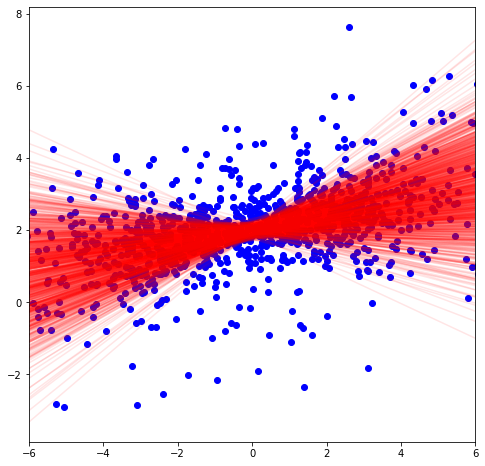

In [55]:
alphas = stats.norm.rvs(2, 0.1, 1000)
betas = stats.norm.rvs(0.2, 0.2, 1000)
xs = stats.norm.rvs(0, 3, 1000)
sigmas = stats.halfnorm.rvs(0, 1, 1000)
mus = alphas + betas * xs
ys = stats.norm.rvs(mus, sigmas)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(xs, ys, color='b')
for alpha, beta in zip(alphas, betas):
    xxs = np.linspace(-6, 6, 1000)
    yys = alpha + beta * xxs
    ax.plot(xxs, yys, color='r', alpha=0.1)
ax.set_xlim(left=-6, right=6)
plt.show()